## Movielens Casestudy Project

In [41]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Task 1 ) Importing 3 datasets

In [42]:
movies=pd.read_table('movies.dat',encoding='Latin-1',delimiter='::',names=['movieid','title','geners'])
ratings=pd.read_table('ratings.dat',encoding='Latin-1',delimiter='::',names=['userid','movieid','rating','timestamps'])
users=pd.read_table('users.dat',encoding='Latin-1',delimiter='::',names=['userid','sex','age','occupation','pincode'])

### Task 2 ) Create a new dataset Master_Data by merging

In [43]:
newframe=pd.merge(movies,ratings,on='movieid')
Master_Data=pd.merge(newframe,users,on='userid')
Master_Data.drop(['timestamps','pincode'],axis=1,inplace=True)
Master_Data

,movieid,title,geners,userid,rating,sex,age,occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10
...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,M,25,4
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,M,25,4
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,M,25,4
1000207,3555,U-571 (2000),Action|Thriller,5727,3,M,25,4


### Task 3 ) User Age Distribution

(array([ 27211.,      0.,      0., 183536., 395556.,      0., 199003.,
             0., 156123.,  38780.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <BarContainer object of 10 artists>)

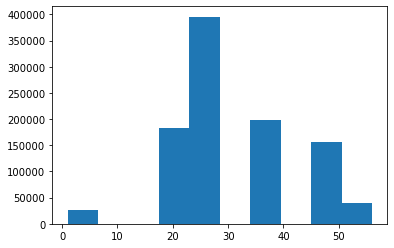

In [44]:
plt.hist(Master_Data['age'])

### Task 4 ) User rating of the movie “Toy Story”

In [45]:
avgrating=Master_Data.groupby('title')['rating'].mean()
print('Average Rating of the movie Toy Story (1995) is ',avgrating.loc['Toy Story (1995)'])

Average Rating of the movie Toy Story (1995) is  4.146846413095811


### Task 5 ) Top 25 movies by viewership rating

In [46]:
avgrating.sort_values(ascending=False).head(25)

title
Ulysses (Ulisse) (1954)                                                5.000000
Lured (1947)                                                           5.000000
Follow the Bitch (1998)                                                5.000000
Bittersweet Motel (2000)                                               5.000000
Song of Freedom (1936)                                                 5.000000
One Little Indian (1973)                                               5.000000
Smashing Time (1967)                                                   5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Baby, The (1973)                                                       5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

### Task 6 ) Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [47]:
Master_Data[Master_Data['userid']==2696].reset_index(drop=True)

,movieid,title,geners,userid,rating,sex,age,occupation
0,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,M,25,7
1,800,Lone Star (1996),Drama|Mystery,2696,5,M,25,7
2,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,M,25,7
3,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,M,25,7
4,1258,"Shining, The (1980)",Horror,2696,4,M,25,7
5,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,M,25,7
6,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,M,25,7
7,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,M,25,7
8,1625,"Game, The (1997)",Mystery|Thriller,2696,4,M,25,7
9,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,M,25,7


### Task 7 ) Find out all the unique genres

In [48]:
genadd=list(Master_Data['geners'].apply(lambda x:x.split('|')))

In [49]:
new=np.concatenate(genadd)
uniquegeners=np.unique(new)
uniquegeners

array(['Action', 'Adventure', 'Animation', "Children's", 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype='<U11')

### Task 8 ) Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [56]:
for i in uniquegeners:
    Master_Data[i]=Master_Data['geners'].apply(lambda x:1 if i in x else 0)
Master_Data

,movieid,title,geners,userid,rating,sex,age,occupation,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,0,0,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10,0,0,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,F,1,10,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10,1,1,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,M,25,4,0,0,...,0,0,0,0,0,0,0,1,0,0
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,M,25,4,0,0,...,0,0,1,0,0,0,0,1,0,0
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,M,25,4,0,0,...,0,0,0,0,0,1,0,0,0,0
1000207,3555,U-571 (2000),Action|Thriller,5727,3,M,25,4,1,0,...,0,0,0,0,0,0,0,1,0,0


### Task 9 ) Determine the features affecting the ratings of any particular movie.

In [51]:
Master_Data.corr()[['rating']]

,rating
movieid,-0.064042
userid,0.012303
rating,1.000000
age,0.056869
occupation,0.006753
Action,-0.047633
Adventure,-0.036718
Animation,0.019670
Children's,-0.039829
Comedy,-0.039622


### Task 10 ) Develop an appropriate model to predict the movie ratings

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [53]:
x=Master_Data[['age','occupation','Action', 'Adventure', 'Animation', "Children's", 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western']]
y=Master_Data['rating']

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
lr.fit(x_train,y_train)

LinearRegression()

In [55]:
lr.predict(x_test)

array([3.52008616, 3.64484968, 3.22999396, ..., 3.46824478, 3.82039564,
       3.54337457])